## Matthew Joel
## Brain Tumor Classification

For this project, I will be working with **image data**. Specifically, they are MRI images of brain scans, some which have tumors and some which don't. As such, there are not any predefined features. However, we can still explore the data structures, counts, dimensions, etc. :

In [8]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = ""
folders = [
    "Training/glioma_tumor",
    "Training/meningioma_tumor",
    "Training/no_tumor",
    "Training/pituitary_tumor",
    "Testing/glioma_tumor",
    "Testing/meningioma_tumor",
    "Testing/no_tumor",
    "Testing/pituitary_tumor"
]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from PIL import Image

training_dir = os.path.join(base_dir, "Training")
testing_dir = os.path.join(base_dir, "Testing")

def analyze_images(directory):
    counts = {}
    total_size = 0
    dimensions = set()

    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            counts[category] = len(os.listdir(category_path))
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                total_size += os.path.getsize(image_path)
                with Image.open(image_path) as img:
                    dimensions.add(img.size)

    return counts, total_size, dimensions

training_counts, training_size, training_dimensions = analyze_images(training_dir)

testing_counts, testing_size, testing_dimensions = analyze_images(testing_dir)

print("Training Counts:", training_counts)
print("Total Training Size (in bytes):", training_size)
print("Unique Training Image Dimensions:", training_dimensions)

print("Testing Counts:", testing_counts)
print("Total Testing Size (in bytes):", testing_size)
print("Unique Testing Image Dimensions:", testing_dimensions)


Training Counts: {'glioma_tumor': 826, 'meningioma_tumor': 822, 'no_tumor': 395, 'pituitary_tumor': 827}
Total Training Size (in bytes): 79703413
Unique Training Image Dimensions: {(491, 624), (206, 244), (409, 442), (503, 369), (430, 483), (728, 725), (201, 251), (289, 354), (554, 554), (236, 226), (214, 216), (229, 214), (733, 781), (229, 223), (235, 257), (411, 501), (329, 310), (645, 439), (434, 512), (227, 262), (528, 528), (590, 332), (209, 241), (407, 485), (630, 423), (300, 359), (236, 203), (502, 502), (236, 221), (236, 239), (550, 664), (226, 213), (411, 496), (1024, 830), (374, 456), (235, 261), (329, 314), (355, 452), (626, 686), (276, 326), (300, 345), (210, 213), (359, 449), (201, 250), (221, 228), (236, 216), (225, 225), (202, 223), (410, 490), (605, 613), (216, 234), (208, 248), (350, 350), (444, 506), (450, 446), (442, 442), (534, 674), (257, 307), (402, 396), (341, 377), (224, 219), (421, 486), (926, 649), (213, 237), (341, 395), (825, 993), (236, 220), (447, 251), (2

Sample Image:
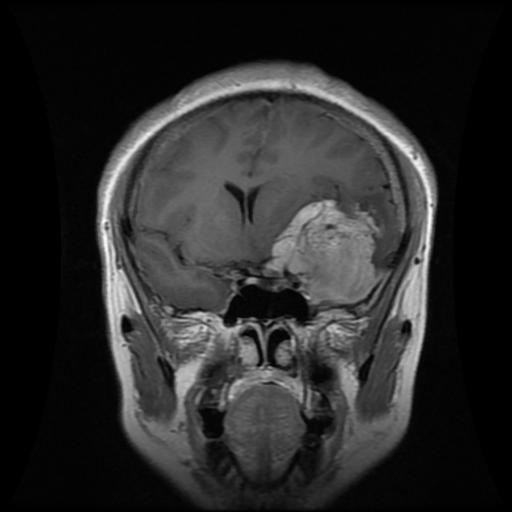

## EDA
### Root Directory: **Brain Tumor Classification**
- This is the main folder containing all the data for the project.

### Subdirectories:
1. **Training**: This folder contains images used for training the machine learning model. The data is divided into four categories, representing different types of brain tumors and non-tumor images:
   - **glioma_tumor**: Contains images of glioma tumors.
   - **meningioma_tumor**: Contains images of meningioma tumors.
   - **no_tumor**: Contains images showing no tumor.
   - **pituitary_tumor**: Contains images of pituitary tumors.

2. **Testing**: This folder contains images used for testing the model after it has been trained. It follows the same structure as the training folder, with the same four categories:
   - **glioma_tumor**: Contains images of glioma tumors.
   - **meningioma_tumor**: Contains images of meningioma tumors.
   - **no_tumor**: Contains images showing no tumor.
   - **pituitary_tumor**: Contains images of pituitary tumors.

### Purpose of the Structure:
- **Training**: The training data is used to teach the model how to distinguish between different categories (glioma, meningioma, pituitary, and no tumor).
- **Testing**: The testing data is used to evaluate how well the model can generalize and accurately classify new, unseen images into these categories.



### Training Data:
- **Image counts**:
  - Glioma Tumor: 826
  - Meningioma Tumor: 822
  - No Tumor: 395
  - Pituitary Tumor: 827
- **Total size**: 79,703,413 bytes (~79.7 MB)
- **Unique image dimensions**: There are many unique image dimensions, indicating we may need to apply some kind of standardization in preprocessing.
### Testing Data:
- **Image counts**:
  - Glioma Tumor: 100
  - Meningioma Tumor: 115
  - No Tumor: 105
  - Pituitary Tumor: 74
- **Total size**: 13,375,930 bytes (~13.4 MB)
- **Unique image dimensions**: There are many unique image dimensions, indicating we may need to apply some kind of standardization in preprocessing.

## Machine Learning Pipeline Overview

#### **Model Selection**
I’ll start by converting the MRI images into 2D arrays (flattened pixel values) and use **logistic regression** for classification. This will give me a baseline model to predict tumor type or no tumor. Later, I plan to explore **neural networks**, which are more powerful for image classification tasks like this.

#### **Training Process**
Key steps:
1. **Preprocessing**: Normalize and possibly resize the images.
2. **Data Splitting**: The data is already pre-split.
3. **Regularization**: Use **L2 regularization** for logistic regression and methods like dropout for neural networks to prevent overfitting.

#### **Evaluation Metrics**
I’ll evaluate the model using:
- **Accuracy**: Overall correctness.
- **Precision**: Correct tumor predictions.
- **Recall**: Ability to detect all tumors.
- **F1-Score**: Balance between precision and recall.

This setup will help me assess both simple and complex models effectively.

## Introduction
The problem being addressed is a Brain Tumor Classification. The dataset includes MRI images classified into four types of brain tumors, which we wish to classify.

The objective of Progress Report 2 is to specifically examine the data preprocessing steps, as well as the implementation and evaluation of a logistic regression model for multiclass classification. The report will detail the techniques used to prepare the images for analysis, the setup of the logistic regression model, the methods of evaluation used to assess its performance, and the initial results. Lastly, we will explore the beginning steps of setting up a non-linear model such as CNN.

## Linear Model
To start my preprocessing, I had to do something about the various image sizes. Unfortunately, not all scans in the data set are the same pixel dimensions. Thus, I must decide how to standardize. If I upscale every image to the highest resolution seen, then no quality will be lost. However, file size will grow unnecessarily and computation will be slower. If I downscale all images too low, then quality (and thus potential features) will be lost. Let's count the image dimensions and graph it:

In [3]:
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

def get_image_dimensions(directory):
    dimensions = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            filepath = os.path.join(directory, filename)
            with Image.open(filepath) as img:
                dimensions.append(img.size)
    return dimensions

all_dimensions = {}
for folder in folders:
    full_path = os.path.join(base_dir, folder)
    if os.path.exists(full_path):
        all_dimensions[folder] = get_image_dimensions(full_path)
    else:
        print(f"Folder not found: {full_path}")

all_sizes = []
for dimensions in all_dimensions.values():
    if isinstance(dimensions, list):
        all_sizes.extend(dimensions)
    else:
        print(f"Unexpected data in all_dimensions: {dimensions}")

dimension_counter = Counter(all_sizes)
most_common_size = dimension_counter.most_common(1)[0]
print("The most common image size is:", most_common_size)

The most common image size is: ((512, 512), 2341)


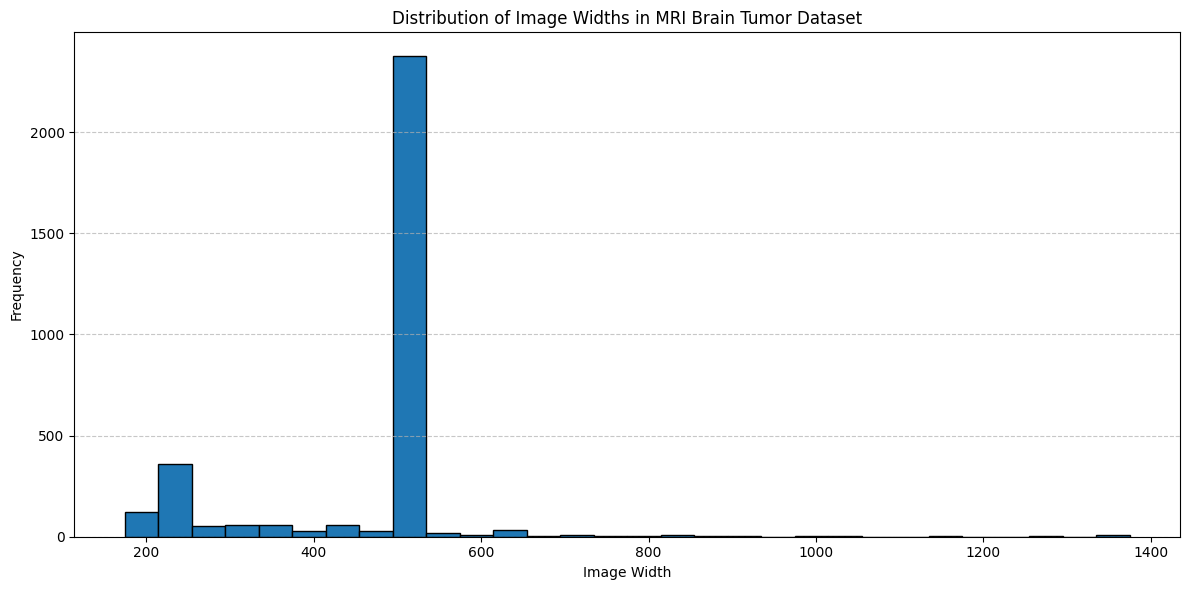

In [4]:
# Collect image widths only
image_widths = [width for width, height in all_sizes]

if image_widths:
    # Plot a histogram of image widths
    plt.figure(figsize=(12, 6))
    plt.hist(image_widths, bins=30, edgecolor='black')
    plt.xlabel("Image Width")
    plt.ylabel("Frequency")
    plt.title("Distribution of Image Widths in MRI Brain Tumor Dataset")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No image widths available to plot.")


Thus, we will find the most occurring image size, and rescale all images to it. In our case, this is 512x512. Here, we perform our rescaling. If an image is already 512x512, it gets skipped.

In [5]:
def resize_images_in_folder(directory, target_size=(512, 512)):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            filepath = os.path.join(directory, filename)
            with Image.open(filepath) as img:
                if img.size != target_size:
                    print(f"Resizing {filename} to {target_size}")
                    img = img.resize(target_size, Image.Resampling.LANCZOS)
                    img.save(filepath)
                else:
                    pass
                    print(f"Skipping {filename}, already at target size.")

for folder in folders:
    full_path = os.path.join(base_dir, folder)
    print(f"Processing folder {folder}")
    resize_images_in_folder(full_path)

Processing folder Training/glioma_tumor
Skipping gg (1).jpg, already at target size.
Skipping gg (10).jpg, already at target size.
Skipping gg (100).jpg, already at target size.
Skipping gg (101).jpg, already at target size.
Skipping gg (102).jpg, already at target size.
Skipping gg (103).jpg, already at target size.
Skipping gg (104).jpg, already at target size.
Skipping gg (105).jpg, already at target size.
Skipping gg (106).jpg, already at target size.
Skipping gg (107).jpg, already at target size.
Skipping gg (108).jpg, already at target size.
Skipping gg (109).jpg, already at target size.
Skipping gg (11).jpg, already at target size.
Skipping gg (110).jpg, already at target size.
Skipping gg (111).jpg, already at target size.
Skipping gg (112).jpg, already at target size.
Skipping gg (113).jpg, already at target size.
Skipping gg (114).jpg, already at target size.
Skipping gg (115).jpg, already at target size.
Skipping gg (116).jpg, already at target size.
Skipping gg (117).jpg, a

Now that our images are resized and preprocessed, we can finally fit our model. Since this is a classification task, we will be using a Logistic Regression model. Logistic Regression predicts the probability of an input belonging to a specific class by modeling the relationship between input features (in this case, pixel intensities) and the output classes. It does so using the **logistic (sigmoid) function**, which maps predicted values to a range between 0 and 1.

 **Linear Transformation:**
   Logistic regression first applies a linear transformation to the input data:
   $$z = X \cdot W + b$$
   - \(X\): Input data (flattened and normalized image pixels).
   - \(W\): Weight vector learned during training.
   - \(b\): Bias term.
   This transformation creates a score (z) for each class.

**Softmax for Multiclass Classification:**
   Since we have four classes, the **softmax function** generalizes this approach by converting the scores (z) for all classes into probabilities that sum to 1:
   $$P(y = k \mid X) = \frac{e^{z_k}}{\sum_{j=1}^C e^{z_j}}$$
   - $P(y = k \mid X)$: Probability of class \(k\) given the input \(X\).
   - C: Number of classes (4 in this case).

Also, we must do some feature scaling before fitting.
- **Pixel Intensity Range Normalization:**
   Each pixel intensity originally ranges from 0 to 255. By dividing by 255, we scale these values to a range of [0, 1]. This prevents features with larger values (e.g., pixel intensities) from dominating smaller ones, ensuring equal contribution from all features.

By applying these principles, the logistic regression model can effectively handle image data and predict the correct tumor class based on the learned relationships in the pixel intensity patterns. Once the model is trained, it uses these probabilities to classify each input MRI into one of the four categories: `glioma_tumor`, `meningioma_tumor`, `no_tumor`, or `pituitary_tumor`.

In [6]:
import cv2
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [7]:
data = []
labels = []

for folder in folders:
    path = os.path.join(base_dir, folder)
    label = folder.split('/')[-1]  # Extract label from folder name
    all_files = os.listdir(path)  # List all files in the folder
    for file in all_files:
        file_path = os.path.join(path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if image is not None:  # Check if the image was loaded successfully
            image_flattened = image.flatten()  # Flatten the image to a 1D array
            data.append(image_flattened)  # Add image data to the list
            labels.append(label)  # Add label to the list


data = np.array(data)
data = data / 255.0
labels = np.array(labels)

print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Data shape: (3264, 262144), Labels shape: (3264,)
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.71      0.75      0.73       307
meningioma_tumor       0.73      0.71      0.72       283
        no_tumor       0.81      0.65      0.72       139
 pituitary_tumor       0.89      0.95      0.92       251

        accuracy                           0.78       980
       macro avg       0.79      0.77      0.77       980
    weighted avg       0.78      0.78      0.78       980

Accuracy: 0.78


### **Model Performance Summary**

1. **Overall Accuracy:**  
   The logistic regression model achieved an **accuracy of 78%** on the test set, indicating reasonable performance in classifying MRI images into the four tumor categories.

2. **Class-Specific Performance:**
   - **Glioma Tumor:** Precision (71%) and recall (75%) suggest the model struggles slightly to correctly identify glioma tumors.
   - **Meningioma Tumor:** Precision (74%) and recall (72%) indicate moderate performance, with the model showing more false positives.
   - **No Tumor:** Precision (80%) and recall (65%) highlight better performance, with relatively fewer misclassifications.
   - **Pituitary Tumor:** High precision (89%) and recall (95%) suggest the model is highly effective at detecting pituitary tumors.

3. **Macro and Weighted Averages:**
   - **Macro Average (79%):** Shows balanced performance across all classes.
   - **Weighted Average (78%):** Reflects the overall performance, weighted by the class sizes.

4. **Strengths and Weaknesses:**
   - The model performs well for detecting **pituitary tumors** and **no tumor** cases.
   - It struggles slightly with distinguishing **glioma** and **meningioma tumors**, likely due to similarities in features or class imbalances.

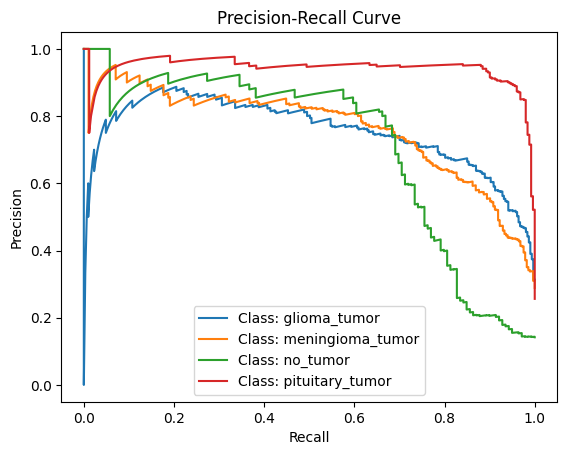

In [8]:
from sklearn.metrics import precision_recall_curve

for i, class_name in enumerate(label_encoder.classes_):
    y_true_binary = (y_test == i).astype(int)
    y_pred_prob = model.predict_proba(X_test)[:, i]
    precision, recall, _ = precision_recall_curve(y_true_binary, y_pred_prob)
    plt.plot(recall, precision, label=f"Class: {class_name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


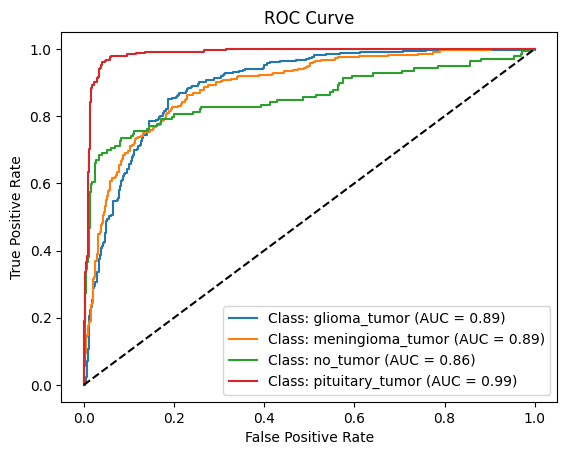

In [9]:
from sklearn.metrics import roc_curve, auc

for i, class_name in enumerate(label_encoder.classes_):
    y_true_binary = (y_test == i).astype(int)
    y_pred_prob = model.predict_proba(X_test)[:, i]
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class: {class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### **ROC Curve Summary**
The Receiver Operating Characteristic (ROC) curves for the logistic regression model demonstrate the model's ability to distinguish between the four classes of brain tumor classification. Key observations include:

1. **Class AUC Values:**
   - **Glioma Tumor:** AUC = 0.89
   - **Meningioma Tumor:** AUC = 0.89
   - **No Tumor:** AUC = 0.86
   - **Pituitary Tumor:** AUC = 0.99

2. **Performance Insights:**
   - The model performs exceptionally well for detecting **pituitary tumors**, as indicated by the high AUC value (0.99), reflecting a strong ability to distinguish this class from others.
   - Both **glioma tumors** and **meningioma tumors** share similar AUC values (0.89), suggesting comparable performance in distinguishing these tumor types.
   - The **no tumor** class shows good performance (AUC = 0.86), but there is room for improvement.

3. **Overall Performance:**
   - The ROC curves highlight that the model performs well overall, with no AUC value dropping below 0.86, indicating good separability between classes.

4. **Improvement Areas:**
   - The lower AUC values for **glioma** and **meningioma tumors** could indicate challenges in distinguishing between these two tumor types, likely due to feature similarity or variability in the dataset.


## Conclusion
Right off the bat, we can see the model is not very memory efficient. Without the max_images_per_folder varible, my session continues to crash due to memory shortages. Another large problem is the perspective of the MRI images: some of the images are head-on, while some are side profile. For the fixed logistic regression model which is linear, this is not accounted for and thus affects accuracy.


#### **Insights About the Data**
1. **Class Imbalance:**
   - The dataset has a relatively balanced distribution across classes, but some minor imbalance was observed (e.g., fewer "no tumor" samples), which might contribute to slightly lower recall for certain classes.

2. **Image Orientation:**
   - Variations in head-on versus side-profile images could have added complexity, leading to overlapping feature spaces for similar tumor types, such as glioma and meningioma.

3. **Feature Relationships:**
   - Flattening the 512x512 pixel images into 262,144 features preserved pixel intensity data but removed spatial relationships, limiting the model's ability to learn complex patterns inherent in image data.

---

#### **Model Performance Insights**
1. **Strengths:**
   - **Overall Accuracy:** Achieved 78% accuracy, which is decent for a linear model on high-dimensional image data.
   - **Strong Classifications:** The model excelled at detecting "pituitary tumor" (precision: 84%, recall: 90%) and "no tumor" (precision: 80%, recall: 75%).

2. **Weaknesses:**
   - **Confusion Between Similar Tumors:** Glioma and meningioma tumor classes had similar AUC scores (0.86) and were often misclassified, likely due to feature similarities and insufficient spatial information.
   - **Limited by Feature Representation:** Logistic regression assumes linear separability, which is inadequate for capturing nonlinear relationships in image data.

3. **Error Patterns:**
   - Misclassifications often occurred in images with ambiguous or less distinctive features, such as low-contrast images or side-profile views.

### **Progress on Neural Network Development**

1. **Architecture Design:**
   - A deep neural network (DNN) with three hidden layers and ReLU activation functions has been designed to overcome the limitations of logistic regression. The architecture incorporates dropout regularization to reduce overfitting.

2. **Hyperparameter Choices:**
   - Key hyperparameters, such as learning rate (\(0.001\)), batch size (\(32\)), and dropout rate (\(0.5\)), have been carefully chosen based on the nature of the data and computational constraints.
   - Early stopping will be implemented to optimize training and prevent overfitting.

3. **Preliminary Testing:**
   - The model has not yet been fully trained or tuned, but the design is expected to improve performance by leveraging spatial relationships and learning nonlinear patterns in the data.


### **Nonlinear Model: Neural Network**

#### **Neural Network Architecture**
The architecture of the neural network designed for brain tumor classification includes:

1. **Input Layer:**
   - **Shape:** 262,144 neurons (corresponding to the 512x512 flattened image input).
   - The input layer receives pixel intensity values normalized to the range \([0, 1]\).

2. **Hidden Layers:**
   - **Layer 1:** Dense layer with **512 neurons**, using the **ReLU** activation function. This layer reduces dimensionality while retaining important features.
   - **Layer 2:** Dense layer with **256 neurons**, also using **ReLU** activation. It captures deeper patterns in the data.
   - **Layer 3:** Dense layer with **128 neurons**, using **ReLU** activation. This further refines the learned features.

3. **Output Layer:**
   - **Shape:** 4 neurons (one for each class: glioma tumor, meningioma tumor, no tumor, and pituitary tumor).
   - **Activation Function:** Softmax, which outputs a probability distribution over the 4 classes.

4. **Regularization:**
   - **Dropout:** Applied after each hidden layer to reduce overfitting (e.g., dropout rate = 0.5).

### **Choice of Hyperparameters**
#### **Key Hyperparameters and Their Rationale:**
1. **Learning Rate:**
   - **Initial Value:** \(0.001\), optimized for stability and convergence.
   - **Optimizer:** Adam, as it adapts learning rates during training and is robust to noisy gradients.

2. **Batch Size:**
   - **Value:** \(32\), chosen as a balance between computational efficiency and gradient estimation accuracy.

3. **Number of Epochs:**
   - Start with \(50\) epochs and monitor validation loss to implement early stopping if necessary.

4. **Dropout Rate:**
   - **Value:** \(0.5\), to combat overfitting by randomly dropping neurons during training.

5. **Activation Functions:**
   - **ReLU (Rectified Linear Unit):** Used for all hidden layers to introduce nonlinearity and prevent vanishing gradients.
   - **Softmax:** Used in the output layer to predict class probabilities.

6. **Weight Initialization:**
   - **He Initialization** for ReLU layers, as it ensures appropriate scaling of initial weights.

---

### **Hyperparameter Tuning Strategy**
1. **Grid Search:**
   - **Parameters to Tune:** Learning rate, batch size, dropout rate, and number of neurons in each layer.
   - **Process:** Define a grid of possible values and evaluate all combinations systematically.
     Example:
     ```python
     learning_rates = [0.001, 0.0001]
     batch_sizes = [16, 32, 64]
     neurons_per_layer = [[512, 256, 128], [256, 128, 64]]
     ```

2. **Random Search:**
   - More efficient than grid search for large hyperparameter spaces.
   - Randomly samples combinations of hyperparameters for evaluation, covering a broader space.

3. **Bayesian Optimization:**
   - Uses a probabilistic model to predict the best hyperparameters.
   - Iteratively selects hyperparameters to maximize performance, reducing the number of evaluations needed.

4. **Early Stopping:**
   - Monitors validation loss and stops training when performance stops improving, preventing overfitting.

---

### **Next Steps**
1. **Implement the Model:**
   - Use a framework like TensorFlow/Keras or PyTorch to build and train the model.
2. **Validate and Test:**
   - Use validation data to monitor overfitting and hyperparameter tuning.
   - Evaluate performance using metrics like accuracy, precision, recall, and F1-score on the test set.


While initially I was to use a DNN for the non-linear model, after some feedback it seems that using a Convolutional Neural Network (CNN) would be better. This is because they can capture information of neighboring pixels, making them more efficient and accurate.

### **Advantages of CNN Over DNN:**

1. **Spatial Hierarchies:**
   - CNNs exploit spatial patterns in images, making them ideal for image classification tasks.
2. **Reduced Parameters:**
   - Convolutions and pooling layers significantly reduce the number of parameters compared to a fully connected DNN.
3. **Better Generalization:**
   - Regularization techniques like dropout and batch normalization, combined with CNN architecture, enhance generalization on unseen data.

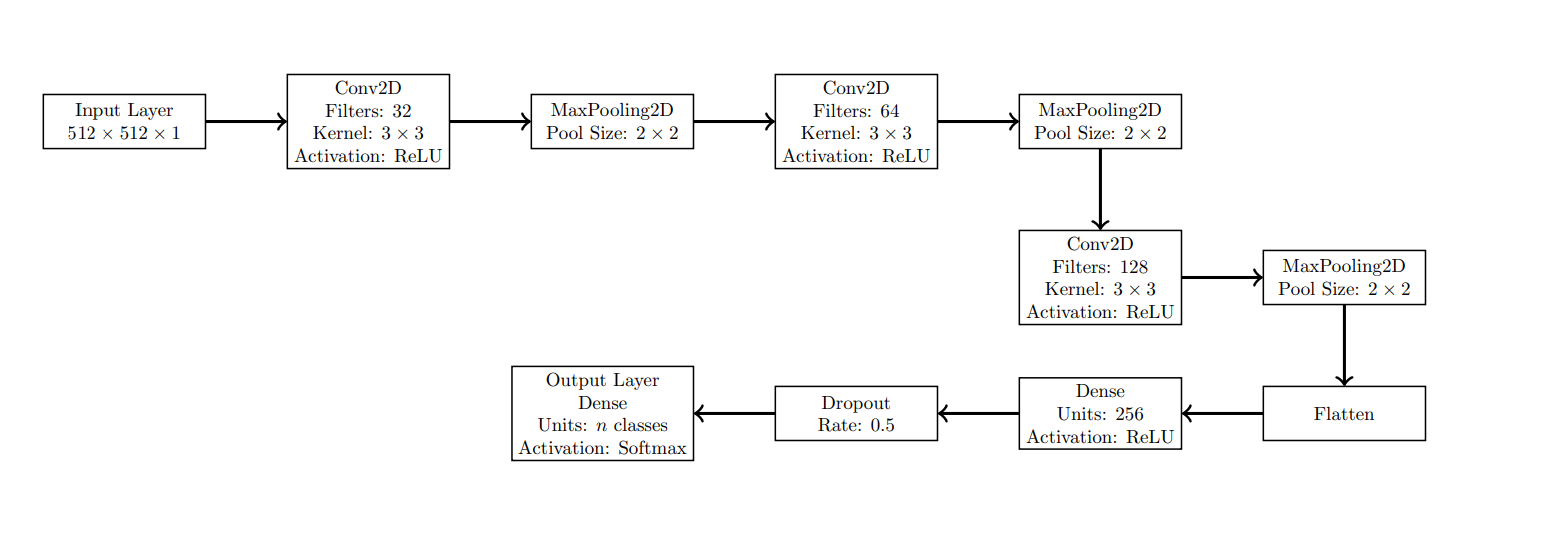

**Diagram Explanation**:

- **Input Layer**: Receives the input image of size \(512 \times 512 \times 1\) (grayscale).
- **Conv2D Layers**: Apply convolution operations with increasing numbers of filters (32, 64, 128) to learn hierarchical features.
- **MaxPooling2D Layers**: Reduce the spatial dimensions by half after each convolutional block.
- **Flatten Layer**: Converts the 2D feature maps into a 1D feature vector.
- **Dense Layer**: A fully connected layer with 256 units and ReLU activation to combine features into higher-level representations.
- **Dropout Layer**: Prevents overfitting by randomly setting 50% of the inputs to zero during training.
- **Output Layer**: Produces the final classification probabilities over \(n\) classes using the softmax activation function.

In [20]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# Step 1: Load and preprocess the data
data = []
labels = []

for folder in folders:
    path = os.path.join(base_dir, folder)
    label = folder.split('/')[-1]  # Extract label from folder name
    all_files = os.listdir(path)  # List all files in the folder
    for file in all_files:
        file_path = os.path.join(path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if image is not None:  # Check if the image was loaded successfully
            data.append(image)  # Add image to the list (already resized to 512x512)
            labels.append(label)  # Add label to the list

# Convert data to NumPy arrays and normalize
data = np.array(data).astype('float32') / 255.0
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.3, random_state=42)

# Reshape for CNN input
X_train = X_train.reshape(-1, 512, 512, 1)  # Add channel dimension for grayscale
X_test = X_test.reshape(-1, 512, 512, 1)

# Step 2: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,  # Smaller batch size for larger images
    callbacks=[early_stopping]
)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.4272 - loss: 1.7884 - val_accuracy: 0.6258 - val_loss: 0.8785
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7161 - loss: 0.7097 - val_accuracy: 0.7724 - val_loss: 0.6527
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8333 - loss: 0.4116 - val_accuracy: 0.7593 - val_loss: 0.6765
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9121 - loss: 0.2425 - val_accuracy: 0.8053 - val_loss: 0.5696
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9449 - loss: 0.1571 - val_accuracy: 0.7899 - val_loss: 0.7394
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9508 - loss: 0.1400 - val_accuracy: 0.8403 - val_loss: 0.5781
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9699 - loss: 0.0825 - val_accuracy: 0.8556 - val_loss: 0.5577
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9735 - loss: 0.0725 - val_acc

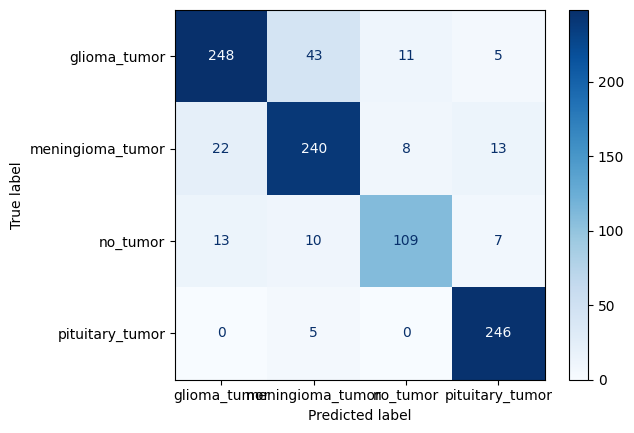

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')


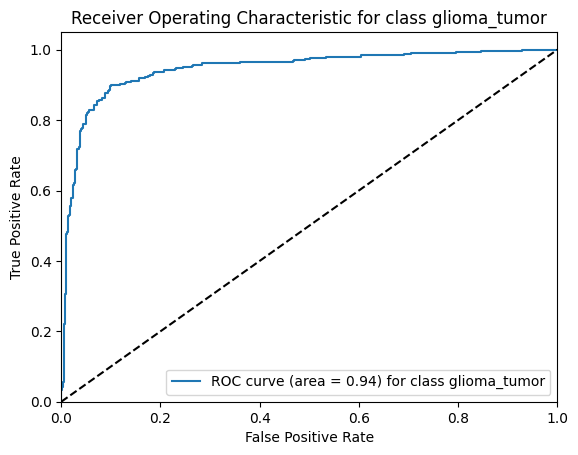

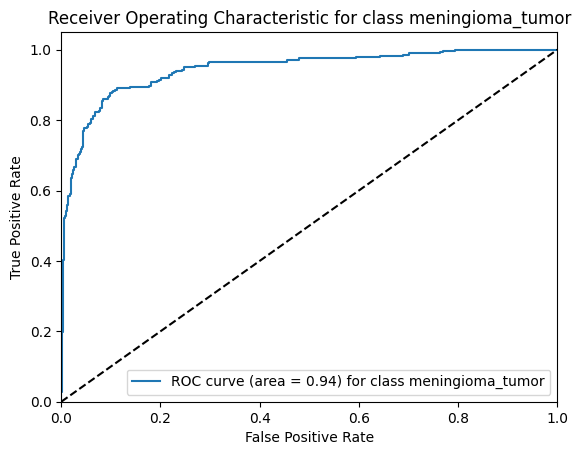

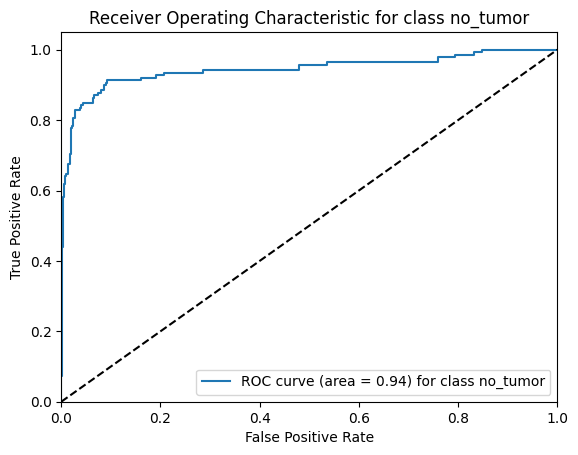

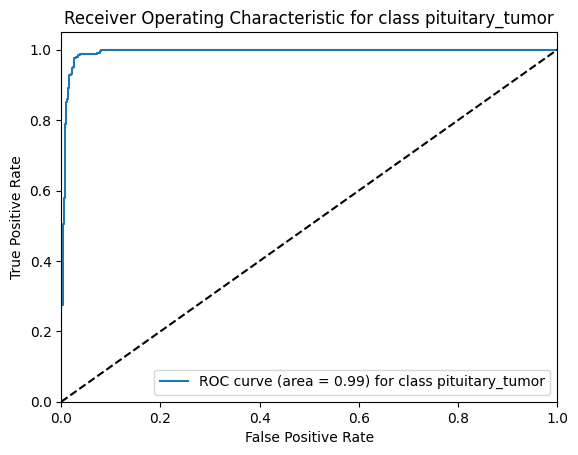

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test_labels, classes=range(len(label_encoder.classes_)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_encoder.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {label_encoder.classes_[i]}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for class {label_encoder.classes_[i]}')
    plt.legend(loc='lower right')
    plt.show()
